In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.models import Model
import timeit

In [ ]:
batch_size = 128
num_classes=10
epochs=2

#input img dimensions
img_rows,img_cols=28,28

(x_train,y_train),(x_test,y_test)=mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
   x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
   x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
   input_shape=(img_rows,img_cols,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
#convert class vectors o binary clss matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3, 3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add (Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=100,
         verbose=1,
         validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 21s 45ms/step - loss: 2.3346 - accuracy: 0.0954 - val_loss: 2.3122 - val_accuracy: 0.0965
Epoch 2/100
469/469 [==============================] - 20s 43ms/step - loss: 2.3281 - accuracy: 0.0953 - val_loss: 2.3055 - val_accuracy: 0.1012
Epoch 3/100
469/469 [==============================] - 20s 42ms/step - loss: 2.3192 - accuracy: 0.0993 - val_loss: 2.2993 - val_accuracy: 0.1072
Epoch 4/100
469/469 [==============================] - 19s 40ms/step - loss: 2.3120 - accuracy: 0.1003 - val_loss: 2.2934 - val_accuracy: 0.1162
Epoch 5/100
469/469 [==============================] - 19s 41ms/step - loss: 2.3065 - accuracy: 0.1057 - val_loss: 2.2878 - val_accuracy: 0.1243
Epoch 6/100
469/469 [==============================] - 20s 42ms/step - loss: 2.3015 - accuracy: 0.1071 - val_loss: 2.2825 - val_accuracy: 0.1321
Epoch 7/100
469/469 [==============================] - 20s 42ms/step - loss: 2.2953 - accuracy: 0.1131 - val_loss: 2.2772 - val_ac

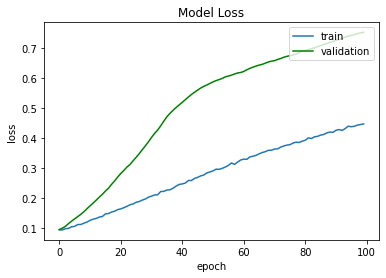

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'g')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


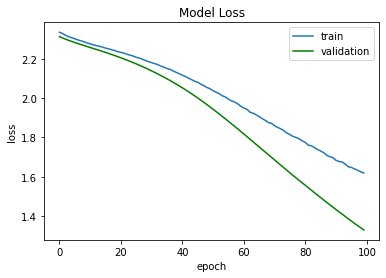

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'g')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(x_train ,y_train,verbose=0)
print('Test loss:',score[0])
print('Test Accuracy',score[1])

Test loss: 1.3434356451034546
Test Accuracy 0.746833324432373


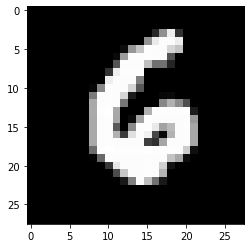

In [ ]:
import pylab as plt
plt.imshow(x_test[130:131].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
import numpy as np
predication=model.predict(x_test[130:131])
print('pred score:\n',predication[0])
thresholded=(predication>0.3)*1
print('\nthresholded score:\n',thresholded[0])
print('predicted digit:\n',np.where(thresholded==1)[1][0])

pred score:
 [0.10228009 0.02254933 0.09713114 0.03790813 0.03631761 0.13145466
 0.34048024 0.01949048 0.15607819 0.0563101 ]

thresholded score:
 [0 0 0 0 0 0 1 0 0 0]
predicted digit:
 6
